In [272]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
train_or = pd.read_csv('train.csv')
test_or = pd.read_csv('test.csv')
dati_or = pd.read_csv('pokemon.csv')

train = train_or.copy()
test = test_or.copy()
dati = dati_or.copy()


Tipi di dato in train e in pokemon.csv:

In [274]:
train.dtypes

Winner            int64
First_pokemon     int64
Second_pokemon    int64
dtype: object

In [275]:
dati.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Elimino la colonna Name non essendo rilevante per il modello

In [276]:
dati.drop(['Name'], axis=1, inplace=True)

Elimino gli spazi e la punteggiatura nei nomi delle colonne:

In [277]:
dati.columns = dati.columns.str.replace(' ', '')
dati.columns = dati.columns.str.replace('.', '')
dati.dtypes

#              int64
Type1         object
Type2         object
HP             int64
Attack         int64
Defense        int64
SpAtk          int64
SpDef          int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

Possibili elementi che posso trovare in Type1 e Type2:

In [278]:
type_list = dati.Type1.unique()
type_list

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [279]:
type2_list = dati.Type2.unique()
type2_list

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

Noto che il tipo 2 può essere nullo. Verifico se vi sono altri valori nulli nel dataset:

In [280]:
dati.replace("", np.nan, inplace=True)
dati.replace(" ", np.nan, inplace=True)
dati.replace("?", np.nan, inplace=True)
dati.isna().sum()

#               0
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
SpAtk           0
SpDef           0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [281]:
train.isna().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [282]:
test.isna().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

Trasformo in interi i dati di tipo object e bool:

In [283]:
for col in dati.columns.values:
    if col=='Type1':
        dati[col] = LabelEncoder().fit_transform(dati[col])
    if col=='Legendary':
        dati[col] = LabelEncoder().fit_transform(dati[col])
    if col=='Type2':
        dati[col] = LabelEncoder().fit_transform(dati[col].astype(str))    

In [284]:
dati.dtypes

#             int64
Type1         int32
Type2         int32
HP            int64
Attack        int64
Defense       int64
SpAtk         int64
SpDef         int64
Speed         int64
Generation    int64
Legendary     int64
dtype: object

In [285]:
dati.head(100)

,#,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,9,13,45,49,49,65,65,45,1,0
1,2,9,13,60,62,63,80,80,60,1,0
2,3,9,13,80,82,83,100,100,80,1,0
3,4,9,13,80,100,123,122,120,80,1,0
4,5,6,18,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,13,18,80,80,50,40,50,25,1,0
96,97,13,18,105,105,75,65,100,50,1,0
97,98,17,18,30,65,100,45,25,40,1,0
98,99,17,11,50,95,180,85,45,70,1,0


Distribuzione del tipo primario e secondario:

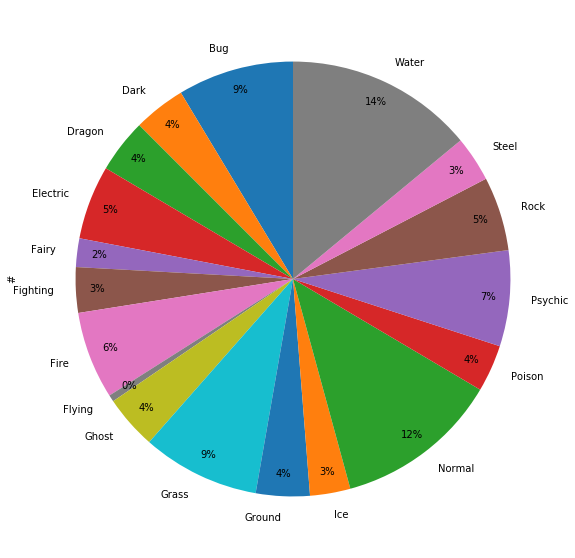

In [286]:
plt.figure(figsize=(10,10))
dati_or.groupby(['Type 1'])['#'].count().plot.pie(autopct='%1.0f%%', pctdistance=0.9, labeldistance=1.1, startangle=90)

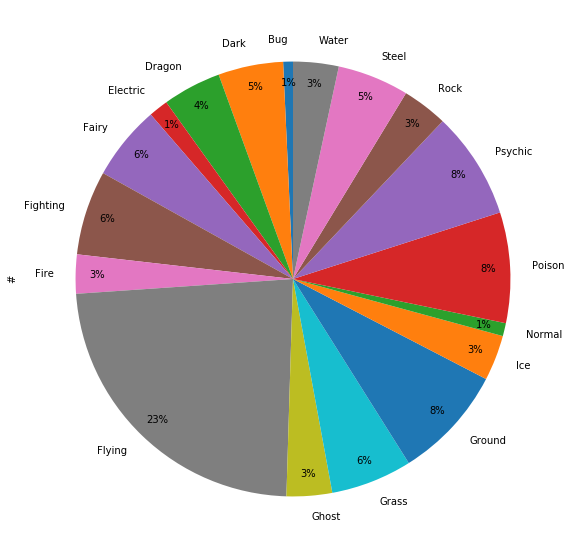

In [287]:
plt.figure(figsize=(10,10))
dati_or.groupby(['Type 2'])['#'].count().plot.pie(autopct='%1.0f%%', pctdistance=0.9, labeldistance=1.1, startangle=90)

Dai grafici risulta che il tipo primario predominante è il tipo water seguito dal tipo nomal e che i valori sono più o meno uniformi, mentre nel tipo secondario il principale è il tipo flying che si distacca di una buona percentuale dagli altri tipi.

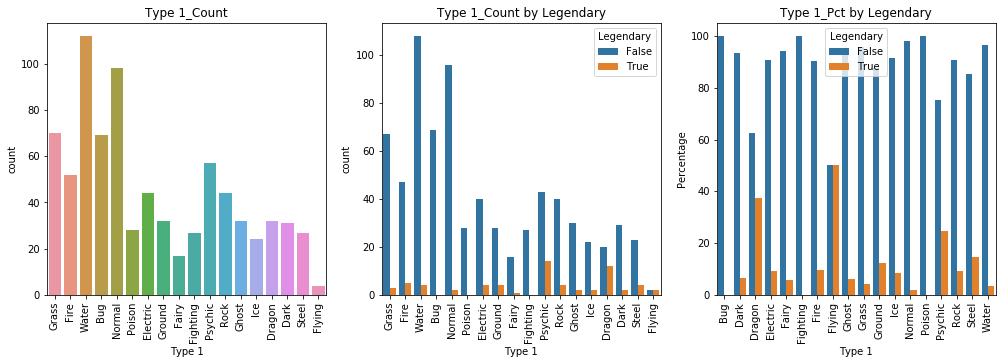

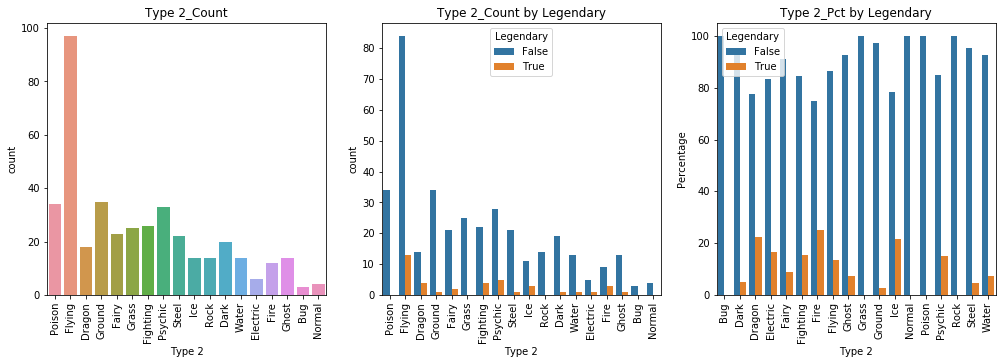

In [288]:
cols=['Type 1', 'Type 2']

for col in cols:
    fig, ax=plt.subplots(1,3,figsize=(17,5))
    data1=(dati_or.groupby(col)["Legendary"].value_counts(normalize=True)*100).rename("Percentage").reset_index()
    sns.countplot(ax=ax[0],x=col, data=dati_or)
    ax[0].set_title(col+"_Count")
    sns.countplot(ax=ax[1],x=col, data=dati_or, hue="Legendary")
    ax[1].set_title(col+"_Count by Legendary")
    sns.barplot(ax=ax[2],x=col, y="Percentage", data=data1, hue="Legendary")
    ax[2].set_title(col+"_Pct by Legendary") 
    for i in range(3):
            ax[i].tick_params(axis="x",labelrotation=90)

Mettendo a confronto i tipi con l'attributo Legendary si può notare che non esistono pokemon legendari con Type1 Bug o Poison e con Type 2 Bug, Grass, Normal, Poison o Rock e che inoltre la metà dei pokemon con primo Type1 Flying ha anche attributo Legendary.

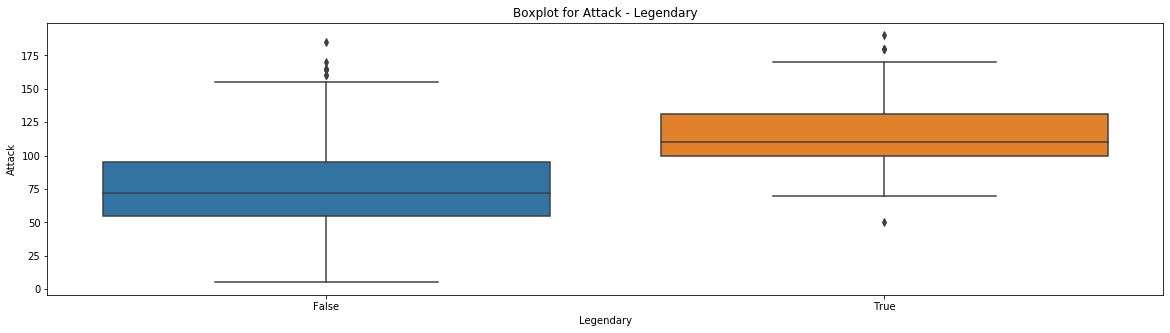

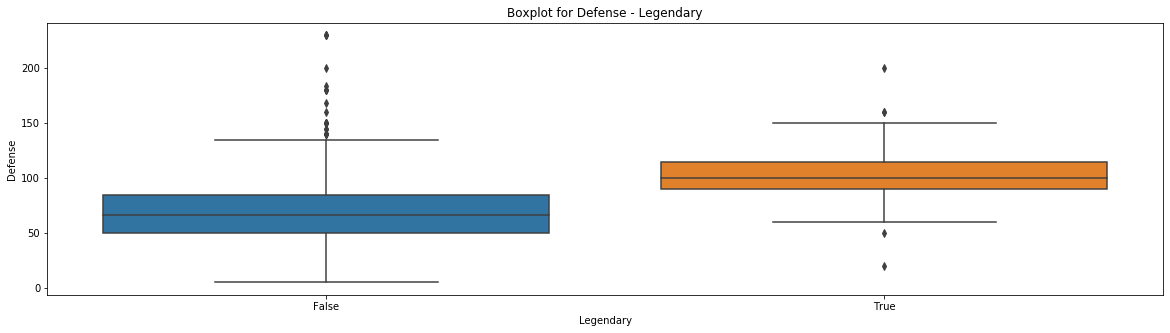

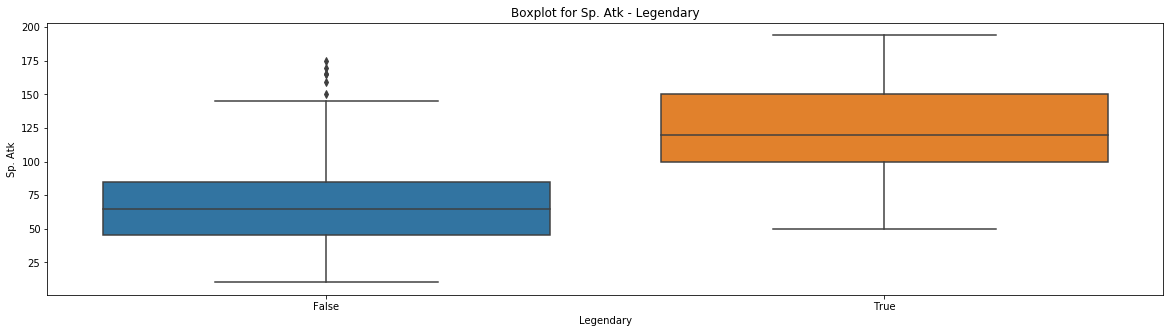

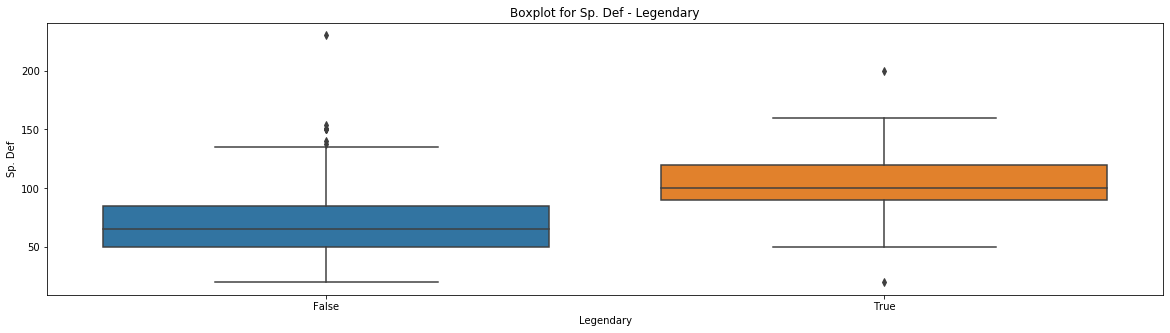

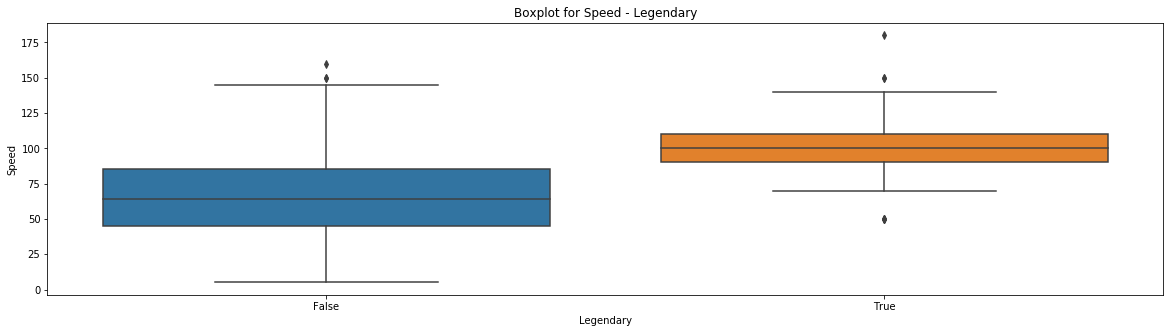

In [289]:
cols=['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for col in cols:
    plt.figure(figsize=(20, 5))
    ax = sns.boxplot(x="Legendary", y=col, data=dati_or)
    ax.set_title("Boxplot for %s - Legendary" % (col))
    plt.show()
            

Da questi grafici si può notare come la feature "Legendary" comporti in pratica delle statistiche molto elevate, è probabile che sia ridondante e che in seguito verrà scartata. Effettuando quindi un confronto tra i grafici appena fatti e quelli fatti poco prima, si può dedurre che determinati Type1 (e quindi anche Type2) comportano statistiche di Attack, Defense, Sp. Atk, Sp. Def e Speed più alti rispetto ad altri tipi (anche questo può portare alla poca utilità dell'attributo Type1 o Type2 che valuterò più avanti).

Effettuo il merge di 'dati' (dati in pokemon.csv rielaborati) con train e test:

In [290]:
provadati=dati.copy()
provadati2=dati.copy()
provadati.columns = provadati.columns.str.replace('#', 'First_pokemon')
provadati2.columns = provadati2.columns.str.replace('#', 'Second_pokemon')
result_train=train.merge(provadati,on="First_pokemon")
train_c=result_train.merge(provadati2,on='Second_pokemon') #train completo
result_test=test.merge(provadati,on="First_pokemon")
test_c=result_test.merge(provadati2,on='Second_pokemon') #test completo
#train_c.to_csv("train_completo.csv")
#test_c.to_csv("test_completo.csv")

In [291]:
train_c.columns

Index(['Winner', 'First_pokemon', 'Second_pokemon', 'Type1_x', 'Type2_x',
       'HP_x', 'Attack_x', 'Defense_x', 'SpAtk_x', 'SpDef_x', 'Speed_x',
       'Generation_x', 'Legendary_x', 'Type1_y', 'Type2_y', 'HP_y', 'Attack_y',
       'Defense_y', 'SpAtk_y', 'SpDef_y', 'Speed_y', 'Generation_y',
       'Legendary_y'],
      dtype='object')

In [292]:
test_c.columns

Index(['Winner', 'First_pokemon', 'Second_pokemon', 'Type1_x', 'Type2_x',
       'HP_x', 'Attack_x', 'Defense_x', 'SpAtk_x', 'SpDef_x', 'Speed_x',
       'Generation_x', 'Legendary_x', 'Type1_y', 'Type2_y', 'HP_y', 'Attack_y',
       'Defense_y', 'SpAtk_y', 'SpDef_y', 'Speed_y', 'Generation_y',
       'Legendary_y'],
      dtype='object')

In [293]:
train_c.head()

,Winner,First_pokemon,Second_pokemon,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,SpAtk_x,SpDef_x,...,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,SpAtk_y,SpDef_y,Speed_y,Generation_y,Legendary_y
0,260,595,260,5,18,105,140,95,55,65,...,6,18,45,75,37,70,55,83,2,0
1,260,363,260,9,18,50,85,40,85,40,...,6,18,45,75,37,70,55,83,2,0
2,260,673,260,2,18,66,117,70,40,50,...,6,18,45,75,37,70,55,83,2,0
3,260,577,260,14,18,76,25,45,67,55,...,6,18,45,75,37,70,55,83,2,0
4,260,507,260,17,18,49,49,56,49,61,...,6,18,45,75,37,70,55,83,2,0


Avendo dei valori per 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def' e 'Speed' per entambi i pokemon posso semplificare riassumendoli in un unico valore per statistica che sarà la differenza dei due valori. 
Trasformo inoltre Winner in un valore tra tra 0 (ha vinto il First_pokemon) e 1 (ha vinto il Second_pokemon).

In [294]:
HP=np.subtract(train_c['HP_x'],train_c['HP_y'])
train_c.insert(3,'HP',HP)
train_c.drop(['HP_x'], axis=1, inplace=True)
train_c.drop(['HP_y'], axis=1, inplace=True)

Att=np.subtract(train_c['Attack_x'],train_c['Attack_y'])
train_c.insert(4,'Attack',Att)
train_c.drop(['Attack_x'], axis=1, inplace=True)
train_c.drop(['Attack_y'], axis=1, inplace=True)

Def=np.subtract(train_c['Defense_x'],train_c['Defense_y'])
train_c.insert(5,'Defense',Def)
train_c.drop(['Defense_x'], axis=1, inplace=True)
train_c.drop(['Defense_y'], axis=1, inplace=True)

SA=np.subtract(train_c['SpAtk_x'],train_c['SpAtk_y'])
train_c.insert(6,'SpAtk',SA)
train_c.drop(['SpAtk_x'], axis=1, inplace=True)
train_c.drop(['SpAtk_y'], axis=1, inplace=True)

SD=np.subtract(train_c['SpDef_x'],train_c['SpDef_y'])
train_c.insert(7,'SpDef',SD)
train_c.drop(['SpDef_x'], axis=1, inplace=True)
train_c.drop(['SpDef_y'], axis=1, inplace=True)

Speed=np.subtract(train_c['Speed_x'],train_c['Speed_y'])
train_c.insert(8,'Speed',Speed)
train_c.drop(['Speed_x'], axis=1, inplace=True)
train_c.drop(['Speed_y'], axis=1, inplace=True)

j=0
for elem in train_c['Winner']:
    if elem==train_c['First_pokemon'][j]:
        train_c['Winner'][j]=0
    else:
        train_c['Winner'][j]=1
    j=j+1

In [295]:
train_c.head()

,Winner,First_pokemon,Second_pokemon,HP,Attack,Defense,SpAtk,SpDef,Speed,Type1_x,Type2_x,Generation_x,Legendary_x,Type1_y,Type2_y,Generation_y,Legendary_y
0,1,595,260,60,65,58,-15,10,-38,5,18,5,0,6,18,2,0
1,1,363,260,5,10,3,15,-15,-48,9,18,3,0,6,18,2,0
2,1,673,260,21,42,33,-30,-5,-16,2,18,5,0,6,18,2,0
3,1,577,260,31,-50,8,-3,0,-59,14,18,5,0,6,18,2,0
4,1,507,260,4,-26,19,-21,6,-17,17,18,4,0,6,18,2,0


In [296]:
HP=np.subtract(test_c['HP_x'],test_c['HP_y'])
test_c.insert(3,'HP',HP)
test_c.drop(['HP_x'], axis=1, inplace=True)
test_c.drop(['HP_y'], axis=1, inplace=True)

Att=np.subtract(test_c['Attack_x'],test_c['Attack_y'])
test_c.insert(4,'Attack',Att)
test_c.drop(['Attack_x'], axis=1, inplace=True)
test_c.drop(['Attack_y'], axis=1, inplace=True)

Def=np.subtract(test_c['Defense_x'],test_c['Defense_y'])
test_c.insert(5,'Defense',Def)
test_c.drop(['Defense_x'], axis=1, inplace=True)
test_c.drop(['Defense_y'], axis=1, inplace=True)

SA=np.subtract(test_c['SpAtk_x'],test_c['SpAtk_y'])
test_c.insert(6,'SpAtk',SA)
test_c.drop(['SpAtk_x'], axis=1, inplace=True)
test_c.drop(['SpAtk_y'], axis=1, inplace=True)

SD=np.subtract(test_c['SpDef_x'],test_c['SpDef_y'])
test_c.insert(7,'SpDef',SD)
test_c.drop(['SpDef_x'], axis=1, inplace=True)
test_c.drop(['SpDef_y'], axis=1, inplace=True)

Speed=np.subtract(test_c['Speed_x'],test_c['Speed_y'])
test_c.insert(8,'Speed',Speed)
test_c.drop(['Speed_x'], axis=1, inplace=True)
test_c.drop(['Speed_y'], axis=1, inplace=True)

j=0
for elem in test_c['Winner']:
    if elem==test_c['First_pokemon'][j]:
        test_c['Winner'][j]=0
    else:
        test_c['Winner'][j]=1
    j=j+1

In [297]:
test_c.head()

,Winner,First_pokemon,Second_pokemon,HP,Attack,Defense,SpAtk,SpDef,Speed,Type1_x,Type2_x,Generation_x,Legendary_x,Type1_y,Type2_y,Generation_y,Legendary_y
0,0,338,111,-20,5,-40,5,-5,25,3,18,3,0,9,14,1,0
1,0,185,111,15,-2,-42,-4,11,27,17,3,2,0,9,14,1,0
2,0,570,111,4,48,-30,28,5,66,1,18,5,0,9,14,1,0
3,0,764,111,11,33,8,60,44,19,17,18,6,0,9,14,1,0
4,1,224,111,15,45,120,-5,20,-10,16,10,2,0,9,14,1,0


In [298]:
train_c['Winner'].count()-train_or['Winner'].count()

0

Verifica: Abbiamo quindi stesso numero di righe 

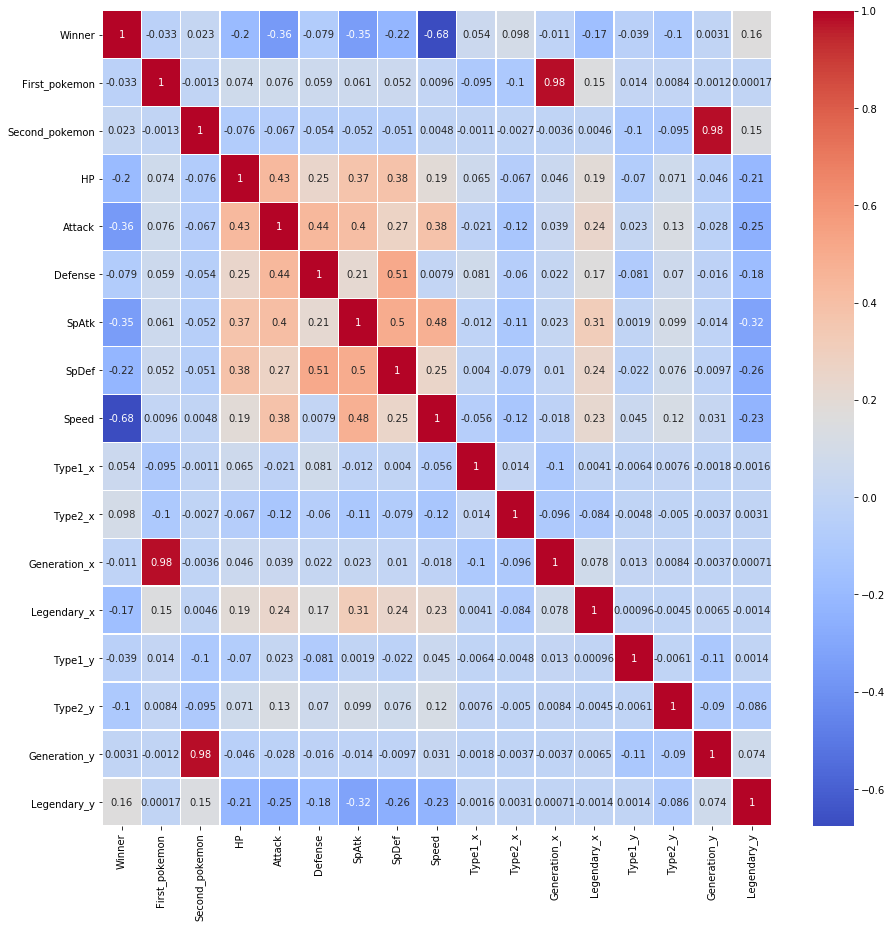

In [299]:
corr = train_c.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

Generation ha una bassa correlazione con Winner, quindi lo posso scartare.
Legendary ha un alta correlazione con le altre feature che includo (un pokemon con attributo Legendary ha in genere statistiche alte da come si poteva anche notare nei grafici precedenti) per questo penso che sia ridondante e che possa essere escluso. Anche l'attributo Type1 (x e y) ha una bassa correlazione con Winner e per questo lo scarto. Stesso discorso per Defense che è prossimo allo 0 e può essere scartato.
Da notare poi che, tra i vari attibuti, si può notare che Speed sia il più influente sulla vittoria.

In [300]:
features = ['HP', 'Attack','SpAtk', 'SpDef', 'Speed','Type2_x', 'Type2_y']
X=train_c[features]
Y=train_c['Winner']
X_test=test_c[features]
Y_test=test_c['Winner']

Specifico il modello:

In [301]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42) 
# RandomForest è un algoritmo che (a differenza del DecisionTree) genera molteplici alberi. 
# Ogni albero classifica un oggetto basandosi sui suoi attributi ed esprimerà quindi un voto per quella classe. 
# Nel caso del RandomForestClassifier si prenderà quindi in considerazione la classificazione che ha ricevuto più voti fra tutti gli altri alberi nella foresta.

# Fit del modello
model.fit(X, Y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [302]:
train_predictions = model.predict(X)
train_acc=metrics.accuracy_score(Y,train_predictions)
print('Accuratezza train: %s'  % train_acc)

test_predictions = model.predict(X_test)
test_acc=metrics.accuracy_score(Y_test,test_predictions)
print('Accuratezza test: %s'  % test_acc)

Accuratezza train: 1.0
Accuratezza test: 0.95575


Stampo l'accuratezza del test in percenuale:

In [303]:
print('%.3f%%' % float(test_acc*100))

95.575%
